# Deep Learning
Date: September 20, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
%load_ext tensorboard

In [3]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Preprocess data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Reshape data to fit model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
# One-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
        tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
        tf.keras.layers.Dropout(0.2, name='layers_dropout'),
        tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
    ])

In [8]:
# Build model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layers_flatten (Flatten)    (None, 784)               0         
                                                                 
 layers_dense (Dense)        (None, 512)               401920    
                                                                 
 layers_dropout (Dropout)    (None, 512)               0         
                                                                 
 layers_dense_2 (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-09-27 13:45:06.980940: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-27 13:45:06.980962: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-27 13:45:06.980968: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-27 13:45:06.981511: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-27 13:45:06.981682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# Compile model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train model
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[tensorboard_callback, learning_rate_reduction])

Epoch 1/10
   1/1875 [..............................] - ETA: 10:04 - loss: 2.3988 - accuracy: 0.0625

2023-09-27 13:45:07.683168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8864

2023-09-27 13:45:31.001632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 26s 14ms/step - loss: 0.4065 - accuracy: 0.8865 - val_loss: 0.3533 - val_accuracy: 0.9067 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4340 - accuracy: 0.8902 - val_loss: 0.4236 - val_accuracy: 0.9002 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5191 - accuracy: 0.8840 - val_loss: 0.4687 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.8822
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5924 - accuracy: 0.8822 - val_loss: 0.6391 - val_accuracy: 0.8634 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4687 - accuracy: 0.8993 - val_loss: 0.3716 - val_accuracy: 0.9226 - lr: 5.0000e-04
Epoch 6/10
1875/1875 [===========================

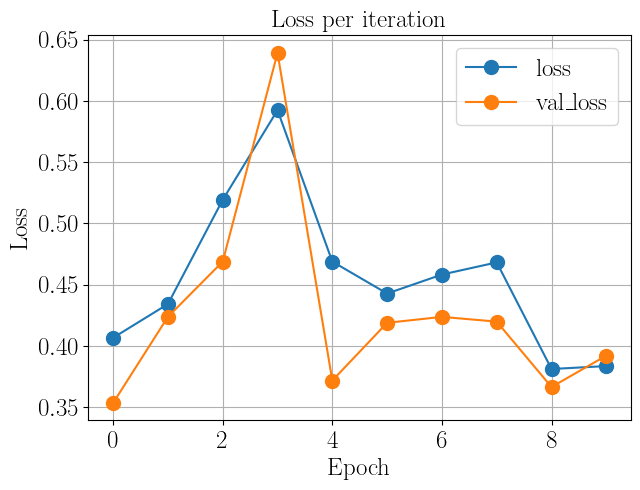

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(model.history.history['loss'], label='loss', marker='o')
ax.plot(model.history.history['val_loss'], label='val_loss', marker='o')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss per iteration')
ax.grid(True)
plt.show()